In [6]:
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
from math import asin
import numpy as np

In [9]:
#Расчёт effect_size для пропорций
def calc_propotion_effect_size(conv_1: int, nobs_1: int, conv_2: int, nobs_2: int):
    prob_1, prob_2 = conv_1 / nobs_1, conv_2 / nobs_2
    
    es_formula = 2  * asin(np.sqrt(prob_1)) - 2 * asin(np.sqrt(prob_2))
    es_import = proportion_effectsize(prob_1, prob_2)
    
    return es_formula, es_import

#Расчёт effect_size для непрерывных метрик
def calc_continuous_effect_size(mean_1: Union[float, int],
                                std_1: Union[float, int],
                                mean_2: Union[float, int],
                                std_2: Union[float, int],
                                nobs_1: int = 10_000,
                                nobs_2: int = 10_000):
    
    es_formula = (mean_1 - mean_2) / ((std_1**2 + std_2**2) / 2) ** 0.5
    es_import = effectsize_smd(mean_1, std_1, nobs_1, mean_2, std_2, nobs_2)[0]
    
    return es_formula, es_import 

In [11]:
#Расчёт минимально необходимой выборки * 2(для теста и контроля) для пропорций
def calc_sample_size_proportion(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    
    n = zt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

#Расчёт минимально необходимой выборки * 2(для теста и контроля) для непрерывной метрики
def calc_sample_size_continuous(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)    

##Задача 1
Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут, а стандартная ошибка (SD) равна 156. Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10%. Средний трафик 20000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20% .

In [24]:
mu_control, mu_test = 25, 27.5
std_control, std_test = 156, 156
traffic = 20_000

effect_size = calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)
sample_size = calc_sample_size_continuous(effect_size=effect_size[1], alpha=.05, beta=.2)

print(f"smple size = {sample_size}, test duration = {sample_size / traffic} days")

smple size = 122257, test duration = 6.11285 days


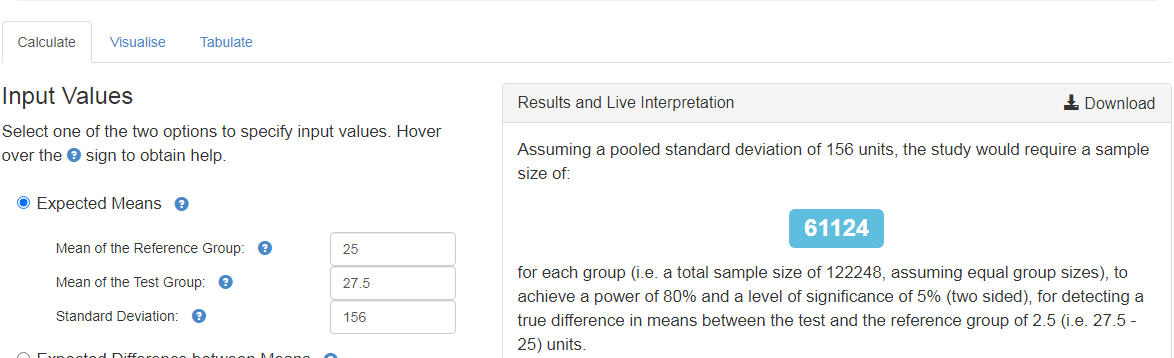

##Задача 2
Наша продуктовая команда в ecommerce магазине планирует запустить тест, направленный на ускорение загрузки сайта. Одна из основных метрик bounce rate в GA = 40%. Мы предполагаем, что при оптимизации сайта она изменится минимум на 20%.Средний трафик 4000 человек в день. Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%

In [17]:
conv_1, conv_2 = 40, 40 - 40 * .2
nobs_1, nobs_2 = 1000, 1000
prob_1, prob_2 = conv_1 / nobs_1, conv_2 / nobs_2
traffic = 4_000
print(prob_1, prob_2)
effect_size = calc_propotion_effect_size(conv_1=conv_1, nobs_1=nobs_1, conv_2=conv_2, nobs_2=nobs_2)[0]
sample_size = calc_sample_size_proportion(effect_size=effect_size, alpha=.05, beta=.2)
print(f"smple size = {sample_size}, test duration = {sample_size / traffic} days")

0.04 0.032
smple size = 16972, test duration = 4.243 days
